In [56]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
from scipy import stats
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.pipeline import Pipeline, make_pipeline

In [57]:
df = pd.read_csv('train.csv')  #parse_dates=True
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Data Fields
datetime - hourly date + timestamp  
season -  1 = spring, 2 = summer, 3 = fall, 4 = winter
<br>
holiday - whether the day is considered a holiday
<br>
workingday - whether the day is neither a weekend nor holiday
<br>
weather - 
<br>
1: Clear, Few clouds, Partly cloudy, Partly cloudy
<br>
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
<br>
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
<br>
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
temp - temperature in Celsius
<br>
atemp - "feels like" temperature in Celsius
<br>
humidity - relative humidity
<br>
windspeed - wind speed
<br>
casual - number of non-registered user rentals initiated
<br>
registered - number of registered user rentals initiated
<br>
count - number of total rentals

**Workflow**

1. Split: train, validation, test
2. EDA (...) exploratory data analysis: we look at features, their distributions, cleaning the data, filling missing values, lloking at correlation between features and output and in between features ...etc.
3. (We fit a very straightforward simple model as our baseline (e.g. dummy classifier))
5. use train and validation data to iteratively improve my model/find best model (feature engineering, hyperparameter tuning, ...)
6. apply best model to test data to estimate how the model will perform on new data (using test score, should not vary too much from the best validation score I get in step 4-5)


In [58]:
df.info()
#all non-null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [62]:
df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,1,1
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,0,2
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,2,3
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,7,8
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,6,14


## Train Test Split

In [63]:
X = df.drop(['count'], axis=1) 
y = df['count']

#df.drop(columns='col1') or df.drop('col1', axis=1)
#drop raw. df.drop(index=['row1', 'row2']), df.drop(['row1', 'row2'], axis=0) or df.drop(['row1', 'row2'])

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [65]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8164, 11), (2722, 11), (8164,), (2722,))

In [66]:
train_data = [X_train, y_train]

In [67]:
df = pd.concat(train_data, axis=1)

In [68]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
2930,2011-07-11 00:00:00,3,0,1,1,28.70,32.575,65,12.9980,10,25,35
7669,2012-05-18 22:00:00,2,0,1,1,22.96,26.515,52,22.0028,57,194,251
1346,2011-04-01 23:00:00,2,0,1,1,12.30,15.910,61,6.0032,12,41,53
9432,2012-09-16 09:00:00,3,0,0,1,23.78,27.275,60,8.9981,70,226,296
453,2011-02-01 23:00:00,1,0,1,3,8.20,9.850,93,12.9980,1,15,16
...,...,...,...,...,...,...,...,...,...,...,...,...
5734,2012-01-14 02:00:00,1,0,0,1,6.56,8.335,47,11.0014,6,32,38
5191,2011-12-10 09:00:00,4,0,0,1,11.48,12.880,61,19.0012,15,134,149
5390,2011-12-18 16:00:00,4,0,0,1,11.48,13.635,48,16.9979,27,207,234
860,2011-02-19 07:00:00,1,0,0,1,15.58,19.695,17,35.0008,6,16,22


## EDA

In [69]:
#datetime's type is object. We should convert it to datetime.
df.datetime = pd.to_datetime(df.datetime)

In [70]:
#create new fcolumns from 'datetime' olumn
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['weekday'] = df['datetime'].dt.day_name()

#dt.day_name, dt.day_name() difference


In [71]:
#pd.concat([df[['day']],pd.get_dummies(df[['year','month','weekday','hour']],columns=['year','month','weekday','hour'])],axis=1)

In [72]:
df['weekday']

2930       Monday
7669       Friday
1346       Friday
9432       Sunday
453       Tuesday
          ...    
5734     Saturday
5191     Saturday
5390       Sunday
860      Saturday
7270    Wednesday
Name: weekday, Length: 8164, dtype: object

In [73]:
#Change the category name for visualization
df["season"] = df.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })

df["weather"] = df.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })

#df.season.map

In [74]:
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
2930,2011-07-11 00:00:00,Fall,0,1,Clear + Few clouds + Partly cloudy + Partly c...,28.70,32.575,65,12.9980,10,25,35,2011,7,11,0,Monday
7669,2012-05-18 22:00:00,Summer,0,1,Clear + Few clouds + Partly cloudy + Partly c...,22.96,26.515,52,22.0028,57,194,251,2012,5,18,22,Friday
1346,2011-04-01 23:00:00,Summer,0,1,Clear + Few clouds + Partly cloudy + Partly c...,12.30,15.910,61,6.0032,12,41,53,2011,4,1,23,Friday
9432,2012-09-16 09:00:00,Fall,0,0,Clear + Few clouds + Partly cloudy + Partly c...,23.78,27.275,60,8.9981,70,226,296,2012,9,16,9,Sunday
453,2011-02-01 23:00:00,Spring,0,1,"Light Snow, Light Rain + Thunderstorm + Scatt...",8.20,9.850,93,12.9980,1,15,16,2011,2,1,23,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,2012-01-14 02:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,6.56,8.335,47,11.0014,6,32,38,2012,1,14,2,Saturday
5191,2011-12-10 09:00:00,Winter,0,0,Clear + Few clouds + Partly cloudy + Partly c...,11.48,12.880,61,19.0012,15,134,149,2011,12,10,9,Saturday
5390,2011-12-18 16:00:00,Winter,0,0,Clear + Few clouds + Partly cloudy + Partly c...,11.48,13.635,48,16.9979,27,207,234,2011,12,18,16,Sunday
860,2011-02-19 07:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,15.58,19.695,17,35.0008,6,16,22,2011,2,19,7,Saturday


[Text(0.5, 0, 'variableTypeariable Type'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Variables DataType Count')]

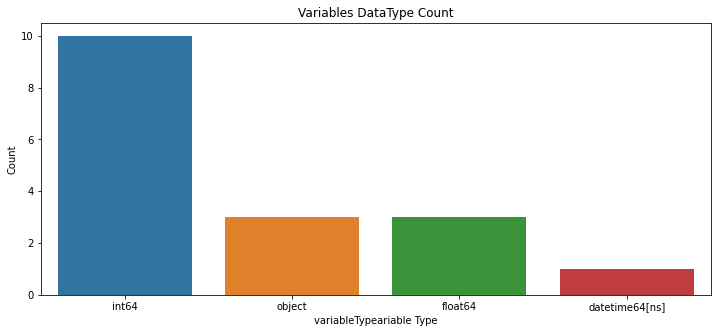

In [75]:
dataTypeDf = pd.DataFrame(df.dtypes.value_counts()).reset_index().rename(columns={"index":"variableType",0:"count"})
fig,ax = plt.subplots()
fig.set_size_inches(12,5)
sns.barplot(data=dataTypeDf,x="variableType",y="count",ax=ax)
ax.set(xlabel='variableTypeariable Type', ylabel='Count',title="Variables DataType Count")

## Outliers Analysis

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

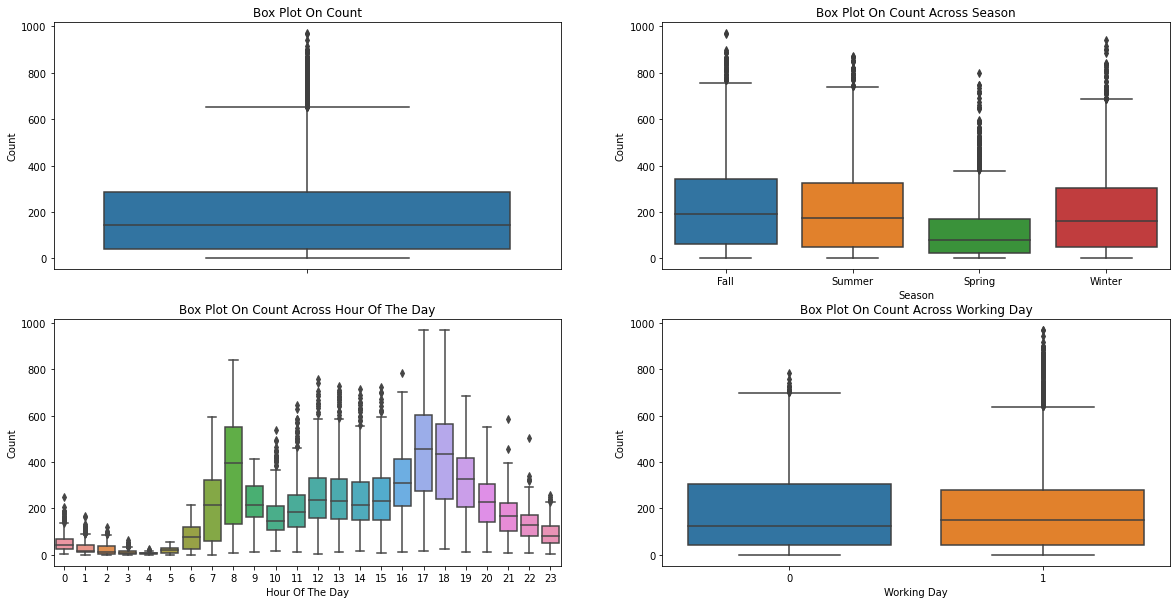

In [76]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20, 10)
sns.boxplot(data=df,y="count",orient="v",ax=axes[0][0])
sns.boxplot(data=df,y="count",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=df,y="count",x="hour",orient="v",ax=axes[1][0])
sns.boxplot(data=df,y="count",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

In [77]:
#remove outliers
dfWithoutOutliers = df[np.abs(df['count']-df['count'].mean())<=(2*df['count'].std())] 

#68% of the data falls within one standard deviation of the mean.
#95% of the data falls within two standard deviations of the mean.
#99.7% of the data falls within three standard deviations of the mean.

#understand why np, np.abs later

In [78]:
df.shape, dfWithoutOutliers.shape

((8164, 17), (7724, 17))

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

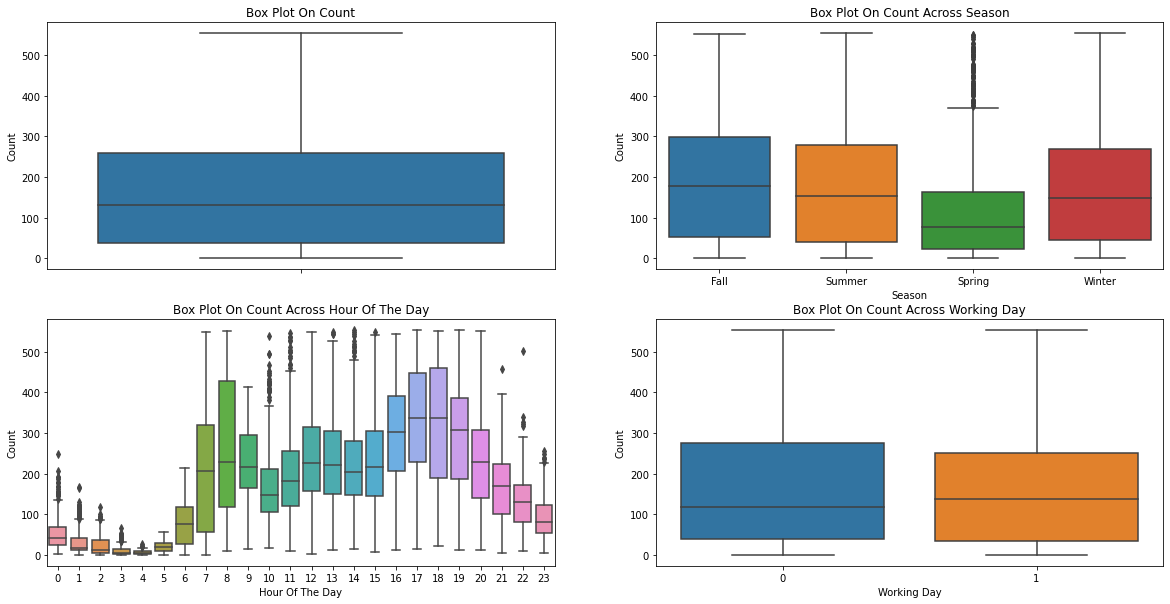

In [79]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(20, 10)
sns.boxplot(data=dfWithoutOutliers,y="count",orient="v",ax=axes[0][0])
sns.boxplot(data=dfWithoutOutliers,y="count",x="season",orient="v",ax=axes[0][1])
sns.boxplot(data=dfWithoutOutliers,y="count",x="hour",orient="v",ax=axes[1][0])
sns.boxplot(data=dfWithoutOutliers,y="count",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

Tried two standard deviations and three standard deviation but two looks much less outliers so I use two here.

## Correlation Analysis

<AxesSubplot:>

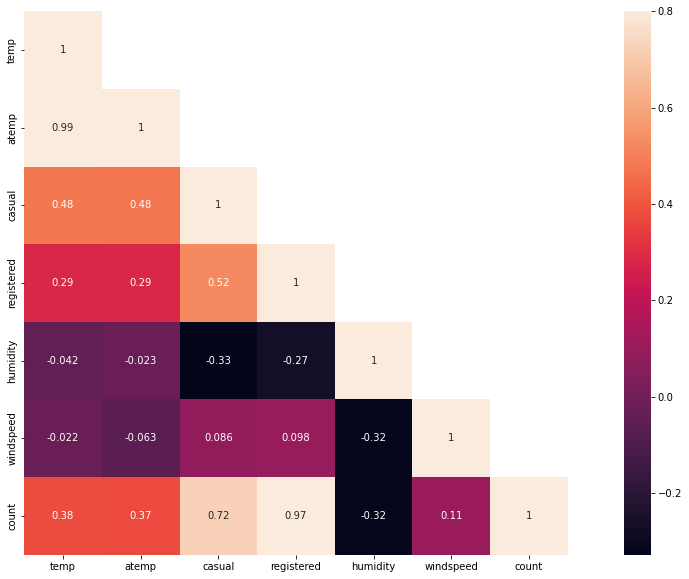

In [80]:
corrMat = dfWithoutOutliers[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(corrMat)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrMat, mask=mask,vmax=.8, square=True,annot=True)

<AxesSubplot:xlabel='humidity', ylabel='count'>

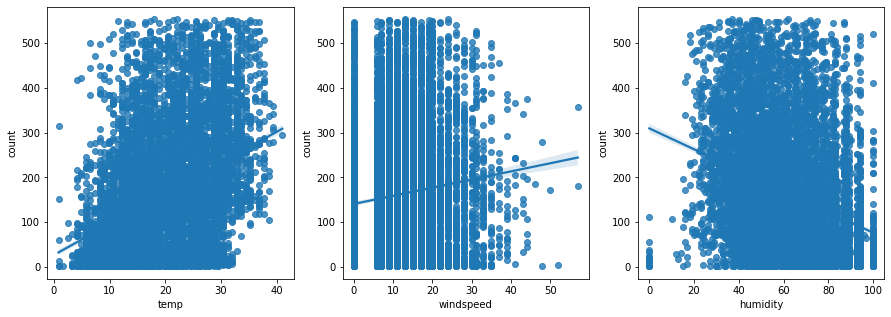

In [81]:
#just visualize
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(15, 5)
sns.regplot(x="temp", y="count", data=dfWithoutOutliers,ax=ax1)
sns.regplot(x="windspeed", y="count", data=dfWithoutOutliers,ax=ax2)
sns.regplot(x="humidity", y="count", data=dfWithoutOutliers,ax=ax3)

'casual' and 'registered' are not taken into account since they are leakage variables and obviously highly correlated.
<br>
'atemp' and 'temp' has got strong correlation with each other. I can also guess 'feels like' temprature should be correlated with temperature.
<br>
'windspeed' is not so correlated with 'count', how every there are many 0 value and if I could deal with it like missing value, I could see this regresson graph minus correlation. And I can imagine if windspeed is fast, people don't wanna use bikes.

## Visualizing Distribution Of Data (remove later)

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


((array([-3.74628769, -3.51749868, -3.39171933, ...,  3.39171933,
          3.51749868,  3.74628769]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.315358  , 6.31716469,
         6.31716469])),
 (1.3190877434985686, 4.4783789095374535, 0.9536328670801815))

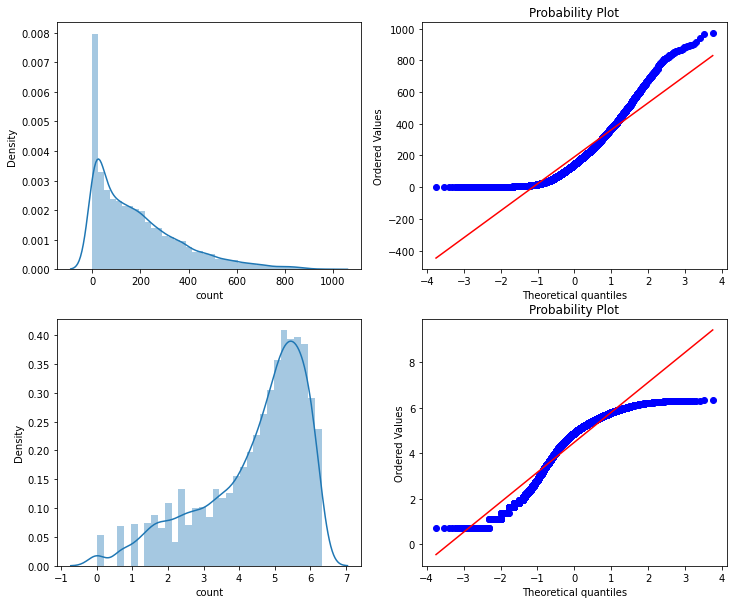

In [82]:
fig,axes = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(12, 10)
sns.distplot(df['count'],ax=axes[0][0])
stats.probplot(df['count'], dist='norm', fit=True, plot=axes[0][1])
sns.distplot(np.log(dfWithoutOutliers['count']),ax=axes[1][0])
stats.probplot(np.log1p(dfWithoutOutliers['count']), dist='norm', fit=True, plot=axes[1][1])

In [83]:
dfWithoutOutliers

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,weekday
2930,2011-07-11 00:00:00,Fall,0,1,Clear + Few clouds + Partly cloudy + Partly c...,28.70,32.575,65,12.9980,10,25,35,2011,7,11,0,Monday
7669,2012-05-18 22:00:00,Summer,0,1,Clear + Few clouds + Partly cloudy + Partly c...,22.96,26.515,52,22.0028,57,194,251,2012,5,18,22,Friday
1346,2011-04-01 23:00:00,Summer,0,1,Clear + Few clouds + Partly cloudy + Partly c...,12.30,15.910,61,6.0032,12,41,53,2011,4,1,23,Friday
9432,2012-09-16 09:00:00,Fall,0,0,Clear + Few clouds + Partly cloudy + Partly c...,23.78,27.275,60,8.9981,70,226,296,2012,9,16,9,Sunday
453,2011-02-01 23:00:00,Spring,0,1,"Light Snow, Light Rain + Thunderstorm + Scatt...",8.20,9.850,93,12.9980,1,15,16,2011,2,1,23,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,2012-01-14 02:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,6.56,8.335,47,11.0014,6,32,38,2012,1,14,2,Saturday
5191,2011-12-10 09:00:00,Winter,0,0,Clear + Few clouds + Partly cloudy + Partly c...,11.48,12.880,61,19.0012,15,134,149,2011,12,10,9,Saturday
5390,2011-12-18 16:00:00,Winter,0,0,Clear + Few clouds + Partly cloudy + Partly c...,11.48,13.635,48,16.9979,27,207,234,2011,12,18,16,Sunday
860,2011-02-19 07:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,15.58,19.695,17,35.0008,6,16,22,2011,2,19,7,Saturday


## Count Vs Month, Season, Hour and Weekday

[Text(0.5, 0, 'Hour Of The Day'),
 Text(0, 0.5, 'Users Count'),
 Text(0.5, 1.0, 'Average Users Count By Hour Of The Day Across User Type'),
 None]

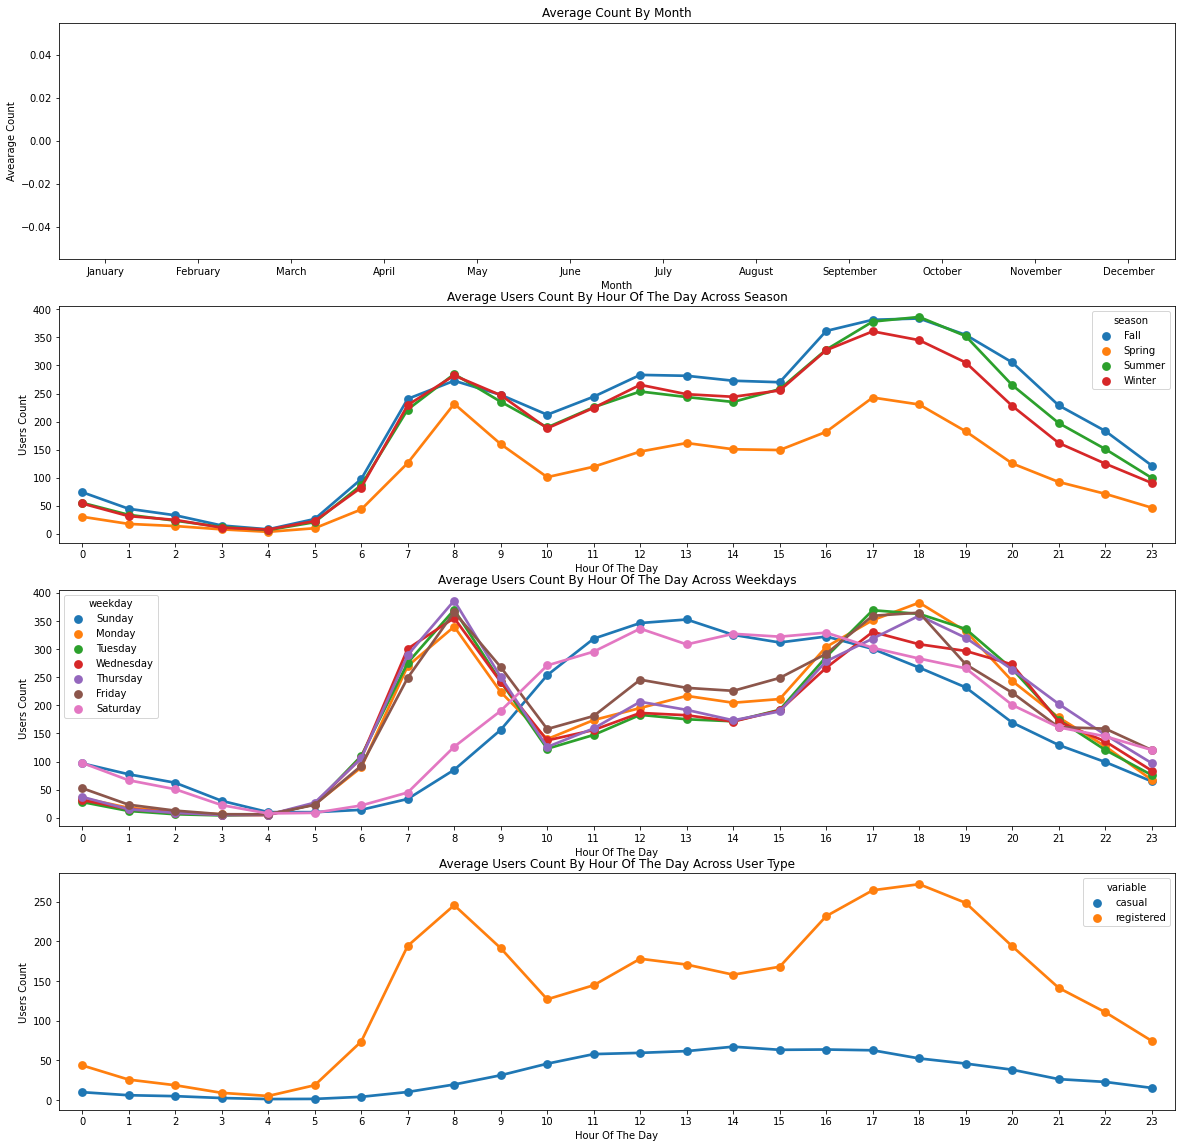

In [84]:
fig,(ax1,ax2,ax3,ax4)= plt.subplots(nrows=4)
fig.set_size_inches(20,20)
sortOrder = ["January","February","March","April","May","June","July","August","September","October","November","December"]
hueOrder = ["Sunday","Monday","Tuesday","Wednesday","Thursday","Friday","Saturday"]

monthAggregated = pd.DataFrame(dfWithoutOutliers.groupby("month")["count"].mean()).reset_index()
monthSorted = monthAggregated.sort_values(by="count",ascending=False) 
sns.pointplot(data=monthSorted,x="month",y="count",ax=ax1,order=sortOrder)
ax1.set(xlabel='Month', ylabel='Avearage Count',title="Average Count By Month")

hourAggregated = pd.DataFrame(dfWithoutOutliers.groupby(["hour","season"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["season"], data=hourAggregated, join=True,ax=ax2)
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Season",label='big')

hourAggregated = pd.DataFrame(dfWithoutOutliers.groupby(["hour","weekday"],sort=True)["count"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"],hue=hourAggregated["weekday"],hue_order=hueOrder, data=hourAggregated, join=True,ax=ax3)
ax3.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across Weekdays",label='big')

hourTransformed = pd.melt(dfWithoutOutliers[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(["hour","variable"],sort=True)["value"].mean()).reset_index()
sns.pointplot(x=hourAggregated["hour"], y=hourAggregated["value"],hue=hourAggregated["variable"],hue_order=["casual","registered"], data=hourAggregated, join=True,ax=ax4)
ax4.set(xlabel='Hour Of The Day', ylabel='Users Count',title="Average Users Count By Hour Of The Day Across User Type",label='big')

#why month average is not plotted?



On weekdays more people tend to rent bicycle around 7AM-8AM and 5PM-6PM. Office hour or school hour. On the other hand, 'Saturday' and 'Sunday', more people tend to rent bicycle between 10AM and 4PM.
<br>
Registered users use in office hours more than casual users.

## Dealing with 0 values of 'windspeed'

Use mean value to 'windspeed' 0

# Creating pipeline

In [85]:
#colums of previous df are messed up during EDA so crearting again
df = pd.read_csv('train.csv')  #parse_dates=True

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [87]:
X = df.drop(['count', 'casual', 'registered'], axis=1) 
y = df['count']
#added 'casual', 'registered because test.csv doesn't have these columns

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

In [89]:
#df = dfWithoutOutliers
#dfWithoutOutliers = df[np.abs(df['count']-df['count'].mean())<=(2*df['count'].std())] 

In [90]:
def extract(df):
        df.datetime = pd.to_datetime(df.datetime)
        df['day'] = df.datetime.dt.day
        df['hour'] = df.datetime.dt.hour
        df['weekday'] = df.datetime.dt.weekday
        df['year'] = df.datetime.dt.year
        df['month'] = df.datetime.dt.month
        
        return pd.concat([df[['day']],pd.get_dummies(df[['year','month','weekday','hour']],columns=['year','month','weekday','hour'])],axis=1)

In [91]:
preprosessor = ColumnTransformer([
    ('do_nothing', 'passthrough', ['holiday', 'workingday']),
    ('time_extact', FunctionTransformer(extract), ['datetime']),
    ('one_hot_encoding', OneHotEncoder(sparse = False), ['season','weather']),
    ('0_imputer', SimpleImputer(strategy='mean', fill_value=0), ['windspeed']),
    #('bins',KBinsDiscretizer(n_bins= 7, encode = 'onehot-dense', strategy = 'quantile'),['temp','humidity','windspeed']) #R-squared 68 to 70 but RMSLE 9.15 to 9.39...
    ], 
    remainder='drop')  #dropping 'casual', 'registered', 'count', 'atemp', 'date', 'datetime'

In [92]:
# create the model pipeline
pipeline = make_pipeline(preprosessor, LinearRegression())

In [93]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('do_nothing', 'passthrough',
                                                  ['holiday', 'workingday']),
                                                 ('time_extact',
                                                  FunctionTransformer(func=<function extract at 0x7fe18902db80>),
                                                  ['datetime']),
                                                 ('one_hot_encoding',
                                                  OneHotEncoder(sparse=False),
                                                  ['season', 'weather']),
                                                 ('0_imputer',
                                                  SimpleImputer(fill_value=0),
                                                  ['windspeed'])])),
                ('linearregression', LinearRegression())])

In [94]:
X_train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
2930,2011-07-11 00:00:00,3,0,1,1,28.70,32.575,65,12.9980
7669,2012-05-18 22:00:00,2,0,1,1,22.96,26.515,52,22.0028
1346,2011-04-01 23:00:00,2,0,1,1,12.30,15.910,61,6.0032
9432,2012-09-16 09:00:00,3,0,0,1,23.78,27.275,60,8.9981
453,2011-02-01 23:00:00,1,0,1,3,8.20,9.850,93,12.9980
...,...,...,...,...,...,...,...,...,...
5734,2012-01-14 02:00:00,1,0,0,1,6.56,8.335,47,11.0014
5191,2011-12-10 09:00:00,4,0,0,1,11.48,12.880,61,19.0012
5390,2011-12-18 16:00:00,4,0,0,1,11.48,13.635,48,16.9979
860,2011-02-19 07:00:00,1,0,0,1,15.58,19.695,17,35.0008


In [95]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8164 entries, 2930 to 7270
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    8164 non-null   object 
 1   season      8164 non-null   int64  
 2   holiday     8164 non-null   int64  
 3   workingday  8164 non-null   int64  
 4   weather     8164 non-null   int64  
 5   temp        8164 non-null   float64
 6   atemp       8164 non-null   float64
 7   humidity    8164 non-null   int64  
 8   windspeed   8164 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 637.8+ KB


In [96]:
pipeline.score(X_train, y_train)

0.6836804979292531

In [97]:
pipeline.score(X_test, y_test)

0.6802282244440019

In [98]:
#Root Mean Squared Logarithmic Error (RMSLE)
def rmsle(y_pred, y,convertExp=True):
    if convertExp:
        y_pred = np.exp(y_pred),
        y = np.exp(y)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y_pred]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [99]:
y_pred = pipeline.predict(X_train) 

In [100]:
rmsle(y_pred, y_train, convertExp=True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/var/folders/fs/bmr1lyws1dx3sp07l0gytvmc0000gn/T/ipykernel_81161/3908407482.py:8: RuntimeWarning: overflow encountered in square
  calc = (log1 - log2) ** 2


inf

## Submission...

In [112]:
kaggle_data = pd.read_csv('test.csv')

In [113]:
kaggle_data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [115]:
predictions = pipeline.predict(kaggle_data)

In [116]:
submission = pd.DataFrame({'datetime':kaggle_data['datetime'],'count':predictions})

In [117]:
submission
#why minus...

,datetime,count
0,2011-01-20 00:00:00,-8.431396e+01
1,2011-01-20 01:00:00,-9.366492e+01
2,2011-01-20 02:00:00,-1.047629e+02
3,2011-01-20 03:00:00,-1.273351e+02
4,2011-01-20 04:00:00,-1.266418e+02
...,...,...
6488,2012-12-31 19:00:00,5.187025e+11
6489,2012-12-31 20:00:00,5.187025e+11
6490,2012-12-31 21:00:00,5.187025e+11
6491,2012-12-31 22:00:00,5.187025e+11


Simply replace the negative predicted values with something else (e.g. zero). e,g: y_pred[y_pred < 0] = 0.0
<br>
Scale / transform the target column (bicycle count). Predict the log of count, for example: m.fit(Xtrain, np.log(ytrain)). Of course, then do not forget to "un-log" (i.e. np.exp()) the prediction afterwards, otherwise your model is reporting the log of the demand, which is on a different scale.
<br>
Use a model that doesn't extrapolate into the negative value problem, e.g. the RandomForestRegressor

In [118]:
#replace negative count to 0
count_0 = submission['count'].where(submission['count'] >= 0, 0)

In [119]:
submission = pd.DataFrame({'datetime':X_kaggle['datetime'],'count':count_0})

In [120]:
submission

,datetime,count
0,2011-01-20 00:00:00,0.000000e+00
1,2011-01-20 01:00:00,0.000000e+00
2,2011-01-20 02:00:00,0.000000e+00
3,2011-01-20 03:00:00,0.000000e+00
4,2011-01-20 04:00:00,0.000000e+00
...,...,...
6488,2012-12-31 19:00:00,5.187025e+11
6489,2012-12-31 20:00:00,5.187025e+11
6490,2012-12-31 21:00:00,5.187025e+11
6491,2012-12-31 22:00:00,5.187025e+11


In [121]:
#Convert DataFrame to a csv file that can be uploaded
filename = 'Bike Sharing Demand LR.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)        

Saved file: Bike Sharing Demand LR.csv


### Memo

In [110]:
#hour
#day of week
#sin cos, anything has cycle(min, hour)
#how to deal with windspeed


#Outliers Analysis
#Correlation Analysis
    #Feature selection(Lasso, RandomForestRegressor) (features are not so many though)
#Visualizing Count Vs (Month,Season,Hour,Weekday,Usertype)

#Future expansion for liniear regression
#RandomForestRegressor for the model
#Hypeprparameter optimization, , cross validation, gridsearch
#Regularization

## Questions